In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
%matplotlib inline
from matplotlib import pyplot
from pandas.plotting import scatter_matrix

In [9]:
data=pd.read_csv("D://datasets//titanic_data.csv")

In [10]:
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [11]:
print("no.of passengers in the dataset:",len(data.index))

no.of passengers in the dataset: 1309


# data analysis

In [12]:
data.dtypes

pclass        int64
survived      int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [13]:
print(data.shape)

(1309, 11)


array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

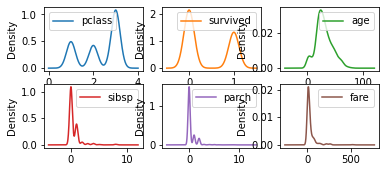

In [14]:
data.plot(kind="density",subplots=True,layout=(3,3),sharex=False)#density plot

pclass         AxesSubplot(0.125,0.657941;0.227941x0.222059)
survived    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
age         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
sibsp          AxesSubplot(0.125,0.391471;0.227941x0.222059)
parch       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
fare        AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

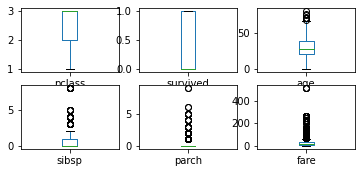

In [15]:
data.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False)

In [16]:
corr=data.corr()
corr

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


<AxesSubplot:xlabel='survived', ylabel='count'>

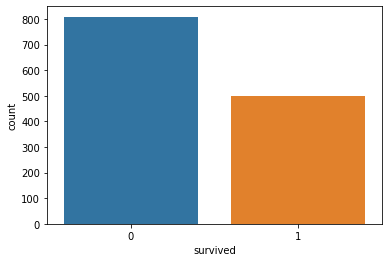

In [17]:
sns.countplot(x='survived',data=data)

from the above plot 0 stands for not survived and 1 for survived thefore it is clear that 550 did not survived only 350 have survived and its very less

array([[<AxesSubplot:xlabel='pclass', ylabel='pclass'>,
        <AxesSubplot:xlabel='survived', ylabel='pclass'>,
        <AxesSubplot:xlabel='age', ylabel='pclass'>,
        <AxesSubplot:xlabel='sibsp', ylabel='pclass'>,
        <AxesSubplot:xlabel='parch', ylabel='pclass'>,
        <AxesSubplot:xlabel='fare', ylabel='pclass'>],
       [<AxesSubplot:xlabel='pclass', ylabel='survived'>,
        <AxesSubplot:xlabel='survived', ylabel='survived'>,
        <AxesSubplot:xlabel='age', ylabel='survived'>,
        <AxesSubplot:xlabel='sibsp', ylabel='survived'>,
        <AxesSubplot:xlabel='parch', ylabel='survived'>,
        <AxesSubplot:xlabel='fare', ylabel='survived'>],
       [<AxesSubplot:xlabel='pclass', ylabel='age'>,
        <AxesSubplot:xlabel='survived', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='sibsp', ylabel='age'>,
        <AxesSubplot:xlabel='parch', ylabel='age'>,
        <AxesSubplot:xlabel='fare', ylabel='age'>],
       [<A

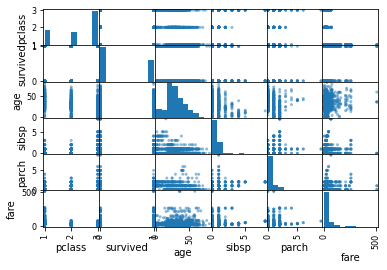

In [18]:
#scatter matrix
scatter_matrix(data)

<AxesSubplot:xlabel='survived', ylabel='count'>

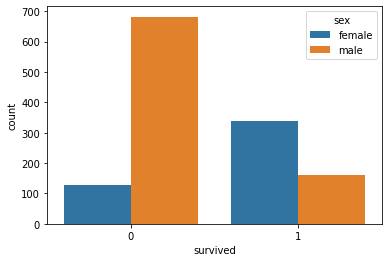

In [19]:
sns.countplot(x='survived',hue='sex',data=data)

from the above plot blue stands for male and orange stands for female who is 3 times more to survive than male this interprets most of the female were likely to be saved

<AxesSubplot:xlabel='survived', ylabel='count'>

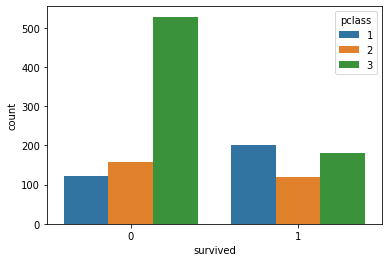

In [20]:
sns.countplot(x='survived',hue='pclass',data=data)

from the above plot most of the 3rd class haven't survived , most of 1st and 2nd class had survived

<AxesSubplot:ylabel='Frequency'>

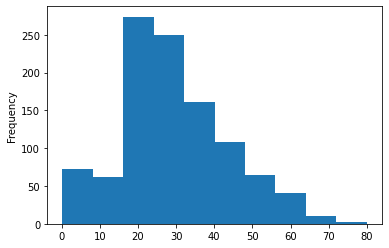

In [21]:
data['age'].plot.hist()

from hist plot its clear that most of the people were average age people its the analysis on age factor

<AxesSubplot:xlabel='sibsp', ylabel='count'>

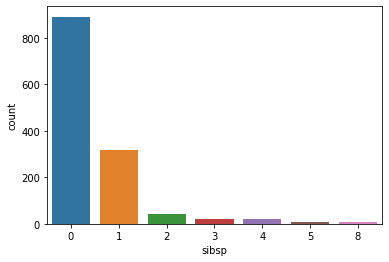

In [23]:
sns.countplot(x= "sibsp",data=data)

# data wrangling

<AxesSubplot:>

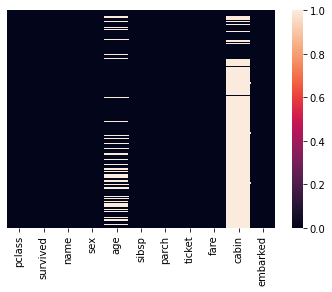

In [35]:
sns.heatmap(data.isnull(),yticklabels=False)

In [36]:
data.drop("cabin",axis=1,inplace=True)

In [37]:
def fills_na(col):
    age=col[0]
    pclass=col[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        if pclass==2:
            return 29
        if pclass==3:
            return 24
    else:
        return age

In [38]:
data['age']=data[['age','pclass']].apply(fills_na,axis=1)

In [40]:
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [41]:
data.dropna(inplace=True)

<AxesSubplot:>

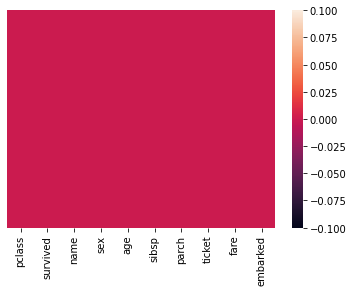

In [43]:
sns.heatmap(data.isnull(),yticklabels=False)

In [44]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [48]:
pd.get_dummies(data["sex"])

,female,male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [49]:
sex=pd.get_dummies(data["sex"],drop_first=True)
sex.head()

,male
0,0
1,1
2,0
3,1
4,0


In [51]:
embarked=pd.get_dummies(data["embarked"])
embarked.head(5)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [50]:
embarked=pd.get_dummies(data["embarked"],drop_first=True)
embarked.head(5)

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [53]:
pclass=pd.get_dummies(data["pclass"])
pclass.head(5)

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [52]:
pclass=pd.get_dummies(data["pclass"],drop_first=True)
pclass.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [54]:
data=pd.concat([data,sex,embarked,pclass],axis=1)

In [55]:
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,C,Q,S,1,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,0,1,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,0,1,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,0,1,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,0,1,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,0,1,1,0,0


In [65]:
data.drop(['pclass','sex','embarked','ticket','name'],axis=1,inplace=True)

In [66]:
data.head(5)

,survived,age,sibsp,parch,fare,male,C,Q,S,1,2,3
0,1,29.0000,0,0,211.3375,0,0,0,1,1,0,0
1,1,0.9167,1,2,151.5500,1,0,0,1,1,0,0
2,0,2.0000,1,2,151.5500,0,0,0,1,1,0,0
3,0,30.0000,1,2,151.5500,1,0,0,1,1,0,0
4,0,25.0000,1,2,151.5500,0,0,0,1,1,0,0


# test train data

In [67]:
x=data.drop(["survived"],axis=1)
y=data["survived"]

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [69]:
test_size=0.3
seed=40
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=test_size, random_state=seed)

In [70]:
log_model=LogisticRegression()

In [71]:
log_model.fit(X_train,Y_train)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predict=log_model.predict(X_test)

In [75]:
report = classification_report(Y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       245
           1       0.74      0.64      0.69       147

    accuracy                           0.78       392
   macro avg       0.77      0.75      0.76       392
weighted avg       0.78      0.78      0.78       392



In [80]:
matrix = confusion_matrix(Y_test, predict)
print(matrix)

[[212  33]
 [ 53  94]]


In [77]:
accuracy_score(Y_test,predict)

0.7806122448979592

In [81]:
log_model.score(X_test,Y_test)

0.7806122448979592

In [86]:
num_folds = 10

kfold = KFold(n_splits = num_folds)
model = LogisticRegression(solver='liblinear')
results = cross_val_score(model, x,y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%) " % (results.mean()*100.0, results.std()*100.0))

Accuracy: 78.628% (4.786%) 


In [87]:
num_folds = 10
seed = 7

loocv = LeaveOneOut()
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, x,y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%) " % (results.mean()*100.0, results.std()*100.0))

Accuracy: 79.173% (40.607%) 


In [88]:
n_splits = 10
kfold = ShuffleSplit(n_splits=n_splits, test_size=0.30, random_state = 42)
model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, x,y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%) " % (results.mean()*100.0, results.std()*100.0))

Accuracy: 79.260% (1.764%) 


the accuracy of the model is 78% while using test train split and its higher while using kfold for evaluation techinque